In [1]:
import numpy as np
import pandas as pd
import boto3
import s3fs
from datetime import timedelta,datetime,date
import os 
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import psycopg2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### prospect data

In [2]:
sd = date(2023,9,1)
ed = date(2023,9,30)
sonew = pd.read_csv('D:\pulse\july till jan\prospects_septtonov_new.csv',parse_dates=['Date'],low_memory=False)
sonew = sonew[(sonew['Date']>=str(sd))&(sonew['Date']<=str(ed))]
sorepeat = pd.read_csv('D:\pulse\july till jan\prospects_septtonov_repeat.csv',parse_dates=['Date'],low_memory=False)
sorepeat = sorepeat[(sorepeat['Date']==str(sd))&(sorepeat['Date']<=str(ed))]
sonew['who'] = 'New'
sorepeat['who'] = 'Existing'
so = pd.concat([sorepeat,sonew],ignore_index=True)
so.head()

,vis,email,phone,Probability of Buying,Prospect,Prospect_Intent,rank,Date,who
0,kziaox5E5GetwB2M,poovaiahrashmi@gmail.com,9686600541,0.992857,1,Very High,1.0,2023-09-01,Existing
1,Nd-R6ey9hjQV7TMr,gowdajahnavi460@gmail.com,9980988677,0.992857,1,Very High,2.0,2023-09-01,Existing
2,jMWkyxMVWM2qYEMG,laharikachowdary116@gmail.com,7569916855,0.992857,1,Very High,3.0,2023-09-01,Existing
3,sCCetEN5_d0_oJSd,mak1119@outlook.com,9766355008,0.992857,1,Very High,4.0,2023-09-01,Existing
4,svVRsmj6xyFK2ixc,durreshahwarruby@gmail.com,8709335290,0.992857,1,Very High,5.0,2023-09-01,Existing


In [3]:
sorepeat.shape
sonew.shape

(117705, 9)

(2557198, 9)

In [3]:
so = so[['vis','email','phone','who']]
so

,vis,email,phone,who
0,kziaox5E5GetwB2M,poovaiahrashmi@gmail.com,9686600541,Existing
1,Nd-R6ey9hjQV7TMr,gowdajahnavi460@gmail.com,9980988677,Existing
2,jMWkyxMVWM2qYEMG,laharikachowdary116@gmail.com,7569916855,Existing
3,sCCetEN5_d0_oJSd,mak1119@outlook.com,9766355008,Existing
4,svVRsmj6xyFK2ixc,durreshahwarruby@gmail.com,8709335290,Existing
...,...,...,...,...
2674898,TsMALuHTf3hshrCV,kunallovess@gmail.com,9560378743,New
2674899,rsSbKU4AppA_0VCX,sanyavinaysingh@gmail.com,7903352976,New
2674900,DrnCh2gzbd4UUpQj,9886659416@claccount.in,9886659416,New
2674901,uc4XWiBd6uvzbMnp,shashankdhardwivedi@hotmail.com,7987362042,New


### sales data

In [4]:
sosales = pd.read_csv('so sales.csv')
sosales = sosales[['bill_email','ph','trans_date']]
sosales.head()

,bill_email,ph,trans_date
0,jewellery@amazon.com,3333398767,2023-10-31
1,kumarsandeep15@hotmail.com,9950115015,2023-10-31
2,9810565994@oneview.com,9810565994,2023-10-31
3,nnn.joy2010@gmail.com,9555562200,2023-10-31
4,rsalian7171@gmail.com,7022060335,2023-10-31


In [5]:
# salesplusvis1 = pd.merge(sosales,so,left_on = 'bill_email',right_on='email',how= 'left',suffixes=('_left','right_email'))
# salesplusvis2 = pd.merge(sosales,so,left_on = 'ph',right_on='phone',how= 'left',suffixes=('_left','right_phone'))
# salesplusvis = pd.concat([salesplusvis1,salesplusvis2.drop_duplicates(subset=['bill_email','ph'])], ignore_index=True)

### merging sales and prosdata

In [6]:
salesplusvis1 = pd.merge(so,sosales,left_on = 'email',right_on='bill_email',how= 'left',suffixes=('_left','right_email'))
salesplusvis2 = pd.merge(so,sosales,left_on = 'phone',right_on='ph',how= 'left',suffixes=('_left','right_phone'))
salesplusvis = pd.concat([salesplusvis1,salesplusvis2.drop_duplicates(subset=['bill_email','ph'])], ignore_index=True)

In [7]:
salesplusvis.drop_duplicates(subset='vis',ignore_index=True,inplace=True)

In [8]:
salesplusvis.vis.value_counts()

vis
kziaox5E5GetwB2M    1
hKESxBdkvDo5JJnP    1
nQni77kyUDM641Wc    1
7t24dHLSl5wpRyoy    1
d5jqiA__3lecxi-R    1
                   ..
22C4xHhKoxDLbuq0    1
wVO8REB3kneTzDHU    1
n5Kr5xYK_F1Xwcbj    1
jccrYWqZLhKz31gH    1
rsSbKU4AppA_0VCX    1
Name: count, Length: 356165, dtype: int64

In [9]:
k = salesplusvis[salesplusvis['email'] == 'gcsuhas94@gmail.com']
k

,vis,email,phone,who,bill_email,ph,trans_date
97943,6lV1UZSl4dfMdQJ-,gcsuhas94@gmail.com,7760645433,Existing,gcsuhas94@gmail.com,7760645433,2023-09-10


In [10]:
clr = pd.read_csv('clr.csv')
gbdt = pd.read_csv('gbdt.csv')
sl = pd.read_csv('shortlisting.csv')

In [11]:
clr['pros_dt'].nunique()
gbdt.head(2)
sl.head(2)

61

,pros,pros_dt,bdayscore,annivscore,spousebdayscore,engagementscore,giftingbannerscore,giftingintent,deliveryintentscore,deliveryintent,buyingintentscore,buyingintent,trialintentscore,trialintent
0,xnx4rdoUfdNqHJCq,2023-09-16,NaN,NaN,NaN,NaN,NaN,no,NaN,low,15.0,high,NaN,low
1,8gt2JxsFFSr1r3Fc,2023-10-17,NaN,NaN,NaN,NaN,NaN,no,3.0,high,NaN,low,1.0,moderate


,pros,pros_dt,ptype
0,hIiz6Ji4LHxIhS1B,2023-09-15,P1
1,k35NRu6fw1b8-hkx,2023-10-31,P1


In [12]:
all_data = []
sd = date(2023,9,1)
ed = date(2023,10,31)
for i in pd.date_range(sd,ed):
    i = i.date()
    c = clr[(clr['pros_dt']==str(i))]
    g = gbdt[(gbdt['pros_dt']==str(i))]
    s = sl[(sl['pros_dt']==str(i))]
    if not c.empty and not g.empty and not s.empty:
        temp = pd.merge(g,c,how='outer',on='pros')
        cron = pd.merge(temp,s,how='outer',on='pros')
        cron.loc[((cron['ptype'] =='P1') | (cron['ptype'] =='P2')),'shortlistingintent']= 'high'
        cron.loc[((cron['ptype'] == 0)),'shortlistingintent']= 'low'
        cron.fillna(0,inplace=True)
        cron['browsing_date'] = pd.to_datetime(i.strftime("%Y-%m-%d"), format='%Y-%m-%d', errors='coerce')
        cron.loc[(cron['browsing_date']==0),'browsing_date']= cron['pros_dt_x']
        cron.loc[(cron['browsing_date']==0),'browsing_date']= cron['pros_dt_y']
        cron.loc[(cron['browsing_date']==0),'browsing_date']= cron['pros_dt']
        # cron['browsing_date'] = pd.to_datetime(cron.browsing_date,format='%d-%m-%Y',errors='coerce')
        final = pd.merge(cron,salesplusvis,left_on='pros',right_on='vis',how='left')
        final.fillna(0,inplace=True)
        final['trans_date'] = pd.to_datetime(final['trans_date'])
        final['diff'] = (final['trans_date']-final['browsing_date']).dt.days
        final2 = final[final['trans_date']!='1970-01-01']
        final3 = final[final['diff']>=1]
        final4 = final3[['pros', 'bdayscore', 'annivscore', 'spousebdayscore',
            'engagementscore', 'giftingbannerscore', 'giftingintent',
            'deliveryintentscore', 'deliveryintent', 'buyingintentscore',
            'buyingintent', 'trialintentscore', 'trialintent',
            'callintent', 'callintentscore', 'leadintent', 'leadintentscore',
            'repeatvisit', 'repeatvisitscore', 'ptype',
            'shortlistingintent', 'browsing_date',
            'bill_email', 'ph', 'who','trans_date', 'diff','pros_dt_x','pros_dt_y','pros_dt']]
        
        all_data.append(final4)
        
final_df = pd.concat(all_data)

In [13]:
final_df.head()

,pros,bdayscore,annivscore,spousebdayscore,engagementscore,giftingbannerscore,giftingintent,deliveryintentscore,deliveryintent,buyingintentscore,...,shortlistingintent,browsing_date,bill_email,ph,who,trans_date,diff,pros_dt_x,pros_dt_y,pros_dt
15,zcnTgWK0-KfkoSh9,0.0,0.0,0.0,0.0,0.0,no,0.0,low,22.0,...,0,2023-09-01,vashalimalar94@gmail.com,8056316314,Existing,2023-10-26,55,2023-09-01,0,0
23,Dd5jDa-A-O5kiyEl,0.0,0.0,0.0,0.0,0.0,no,0.0,low,13.0,...,0,2023-09-01,general.ayesha@yahoo.com,7990929755,Existing,2023-09-04,3,2023-09-01,0,0
43,8TjEq47gOI5yv733,0.0,0.0,0.0,0.0,0.0,no,0.0,low,25.0,...,0,2023-09-01,karthika.dakshina@gmail.com,9944818910,New,2023-09-09,8,2023-09-01,0,0
51,9ryQmaHlGGUHIsYQ,0.0,0.0,0.0,0.0,0.0,no,0.0,low,9.0,...,0,2023-09-01,jkh142@gmail.com,9810818705,New,2023-09-13,12,2023-09-01,0,0
83,90N05JmRlHjbhIyh,0.0,0.0,0.0,0.0,0.0,no,0.0,low,18.0,...,0,2023-09-01,mansi.rathi88@gmail.com,9953944385,Existing,2023-10-28,57,2023-09-01,0,0


In [14]:
# final_df[final_df['browsing_date']=='2023-09-12']
k = final_df[final_df['pros']=='X_8IV-W2TJZakq9p']
# k.to_csv('testing.csv',index=False)

In [15]:
k

,pros,bdayscore,annivscore,spousebdayscore,engagementscore,giftingbannerscore,giftingintent,deliveryintentscore,deliveryintent,buyingintentscore,...,shortlistingintent,browsing_date,bill_email,ph,who,trans_date,diff,pros_dt_x,pros_dt_y,pros_dt
3906,X_8IV-W2TJZakq9p,0.0,0.0,0.0,0.0,0.0,no,0.0,low,16.0,...,0,2023-09-01,aishwaryasriragh@gmail.com,9620953791,Existing,2023-10-31,60,2023-09-01,0,0
12527,X_8IV-W2TJZakq9p,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,high,2023-10-04,aishwaryasriragh@gmail.com,9620953791,Existing,2023-10-31,27,0,0,2023-10-04
10340,X_8IV-W2TJZakq9p,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,0,2023-10-29,aishwaryasriragh@gmail.com,9620953791,Existing,2023-10-31,2,0,2023-10-29,0


In [16]:
final_df['pros'].nunique()

24900

In [17]:
final_df['pros'].value_counts()

pros
e2Lk_G31yeDhCLCG    3
XSGiwtQtkcqzLXCQ    3
gDnfZuwo5jDW4HQ4    3
gJJoZOZj6MmUMa8w    3
Qa45JgLdM0zJbs4m    3
                   ..
-Zi2kQ8uUhwpwqcg    1
sNE2K9bojBl0Djwo    1
G2I7Hbri8kJSHwpw    1
kYgISBU0kwsqlXh4    1
UM9cWlC9P1nvEcU7    1
Name: count, Length: 24900, dtype: int64

In [18]:
final_df.sort_values(by='browsing_date', ascending=False, inplace=True)

In [19]:
final_df.drop_duplicates(subset=['pros'],keep='first',inplace=True,ignore_index=True)

In [20]:
final_df[final_df['pros']=='uqdKMvth1zqeF1XL']

,pros,bdayscore,annivscore,spousebdayscore,engagementscore,giftingbannerscore,giftingintent,deliveryintentscore,deliveryintent,buyingintentscore,...,shortlistingintent,browsing_date,bill_email,ph,who,trans_date,diff,pros_dt_x,pros_dt_y,pros_dt
24680,uqdKMvth1zqeF1XL,0.0,0.0,0.0,0.0,0.0,no,0.0,low,12.0,...,high,2023-09-01,djshireen@gmail.com,9930080960,Existing,2023-10-15,44,2023-09-01,0,2023-09-01


In [21]:
final_df['giftingintent'].replace(['high','low','no'],[3, 1, 0], inplace=True)
final_df['shortlistingintent'].replace(['high'],[3], inplace=True)
final_df['deliveryintent'].replace(['high','moderate','low'],[3, 2, 1], inplace=True)
final_df['buyingintent'].replace(['high','moderate','low'],[3, 2, 1], inplace=True)
final_df['trialintent'].replace(['high','moderate','low'],[3, 2, 1], inplace=True)
final_df['callintent'].replace(['high','moderate','low'],[3, 2, 1], inplace=True)
final_df['leadintent'].replace(['high','moderate','low'],[3, 2, 1], inplace=True)
final_df['repeatvisit'].replace(['high','moderate','low'],[3, 2, 1], inplace=True)
final_df['ptype'].replace(['P1','P2'],[3, 3], inplace=True)

In [22]:
final_df.to_csv('deepak/buyerslist.csv',index=False)

## for nonbuyers

In [23]:
all_data1 = []
sd = date(2023,9,1)
ed = date(2023,10,31)
for i in pd.date_range(sd,ed):
    i = i.date()
    c = clr[(clr['pros_dt']==str(i))]
    g = gbdt[(gbdt['pros_dt']==str(i))]
    s = sl[(sl['pros_dt']==str(i))]
    if not c.empty and not g.empty and not s.empty:
        temp = pd.merge(g,c,how='outer',on='pros')
        cron = pd.merge(temp,s,how='outer',on='pros')
        cron.loc[((cron['ptype'] =='P1') | (cron['ptype'] =='P2')),'shortlistingintent']= 'high'
        cron.loc[((cron['ptype'] == 0)),'shortlistingintent']= 'low'
        cron.fillna(0,inplace=True)
        cron['browsing_date'] = pd.to_datetime(i.strftime("%Y-%m-%d"), format='%Y-%m-%d', errors='coerce')
        cron.loc[(cron['browsing_date']==0),'browsing_date']= cron['pros_dt_x']
        cron.loc[(cron['browsing_date']==0),'browsing_date']= cron['pros_dt_y']
        cron.loc[(cron['browsing_date']==0),'browsing_date']= cron['pros_dt']

        all_data1.append(cron)
final_nb_df = pd.concat(all_data1)

In [24]:
final_nb_df.drop_duplicates(subset=['pros'],keep='first',inplace=True,ignore_index=True)

In [25]:
values = set(final_df['pros'])
final_nb_df['Match'] = final_nb_df['pros'].isin(values).astype(int)

In [26]:
final_nb_df['Match'].value_counts()

Match
0    871255
1     24900
Name: count, dtype: int64

In [27]:
final_nb_df['giftingintent'].replace(['high','low','no'],[3, 1, 0], inplace=True)
final_nb_df['shortlistingintent'].replace(['high'],[3], inplace=True)
final_nb_df['deliveryintent'].replace(['high','moderate','low'],[3, 2, 1], inplace=True)
final_nb_df['buyingintent'].replace(['high','moderate','low'],[3, 2, 1], inplace=True)
final_nb_df['trialintent'].replace(['high','moderate','low'],[3, 2, 1], inplace=True)
final_nb_df['callintent'].replace(['high','moderate','low'],[3, 2, 1], inplace=True)
final_nb_df['leadintent'].replace(['high','moderate','low'],[3, 2, 1], inplace=True)
final_nb_df['repeatvisit'].replace(['high','moderate','low'],[3, 2, 1], inplace=True)
final_nb_df['ptype'].replace(['P1','P2'],[3, 3], inplace=True)

In [28]:
final_nb_df2 = final_nb_df[final_nb_df['Match']==0]

In [29]:
final_nb_df2.to_csv('deepak/nonbuyerslist.csv',index=False)

In [30]:
final_nb_df2['Match'].unique()

array([0])

In [31]:
# i = date(2023,9,1)
# c = clr[(clr['pros_dt']==str(i))]
# g = gbdt[(gbdt['pros_dt']==str(i))]
# s = sl[(sl['pros_dt']==str(i))]
# temp = pd.merge(g,c,how='outer',on='pros')
# cron = pd.merge(temp,s,how='outer',on='pros')
# cron
# cron.loc[((cron['ptype'] =='P1') | (cron['ptype'] =='P2')),'shortlistingintent']= 'high'
# cron.loc[((cron['ptype'] == 0)),'shortlistingintent']= 'low'
# cron.fillna(0,inplace=True)
# cron['browsing_date'] = pd.to_datetime(i.strftime("%Y-%m-%d"), format='%Y-%m-%d', errors='coerce')
# cron.loc[(cron['browsing_date']==0),'browsing_date']= cron['pros_dt_x']
# cron.loc[(cron['browsing_date']==0),'browsing_date']= cron['pros_dt_y']
# cron.loc[(cron['browsing_date']==0),'browsing_date']= cron['pros_dt']
# # cron['browsing_date'] = pd.to_datetime(cron.browsing_date,format='%d-%m-%Y',errors='coerce')
# final = pd.merge(cron,salesplusvis,left_on='pros',right_on='vis',how='left')
# final.fillna(0,inplace=True)
# final['trans_date'] = pd.to_datetime(final['trans_date'])
# final['diff'] = (final['trans_date']-final['browsing_date']).dt.days
# final2 = final[final['trans_date']!='1970-01-01']
# final3 = final[final['diff']>=1]
# final4 = final3[['pros', 'bdayscore', 'annivscore', 'spousebdayscore',
#        'engagementscore', 'giftingbannerscore', 'giftingintent',
#        'deliveryintentscore', 'deliveryintent', 'buyingintentscore',
#        'buyingintent', 'trialintentscore', 'trialintent',
#        'callintent', 'callintentscore', 'leadintent', 'leadintentscore',
#        'repeatvisit', 'repeatvisitscore', 'ptype',
#        'shortlistingintent', 'browsing_date',
#        'bill_email', 'ph', 'who','trans_date', 'diff']]

In [32]:
final_df['Match'] = 1

In [33]:
buyers = final_df[['pros', 'bdayscore', 'annivscore', 'spousebdayscore', 'engagementscore',
       'giftingbannerscore', 'giftingintent', 'deliveryintentscore',
       'deliveryintent', 'buyingintentscore', 'buyingintent',
       'trialintentscore', 'trialintent', 'callintent', 'callintentscore',
       'leadintent', 'leadintentscore', 'repeatvisit', 'repeatvisitscore',
       'ptype', 'shortlistingintent', 'browsing_date', 'Match']]

nonbuyers = final_nb_df2[['pros', 'bdayscore', 'annivscore', 'spousebdayscore',
       'engagementscore', 'giftingbannerscore', 'giftingintent',
       'deliveryintentscore', 'deliveryintent', 'buyingintentscore',
       'buyingintent', 'trialintentscore', 'trialintent',
       'callintent', 'callintentscore', 'leadintent', 'leadintentscore',
       'repeatvisit', 'repeatvisitscore', 'ptype',
       'shortlistingintent', 'browsing_date', 'Match']]

In [34]:
buyers.dtypes
nonbuyers.dtypes    

pros                           object
bdayscore                     float64
annivscore                    float64
spousebdayscore               float64
engagementscore               float64
giftingbannerscore            float64
giftingintent                   int64
deliveryintentscore           float64
deliveryintent                  int64
buyingintentscore             float64
buyingintent                    int64
trialintentscore              float64
trialintent                     int64
callintent                      int64
callintentscore               float64
leadintent                      int64
leadintentscore               float64
repeatvisit                     int64
repeatvisitscore              float64
ptype                           int64
shortlistingintent              int64
browsing_date          datetime64[ns]
Match                           int64
dtype: object

pros                           object
bdayscore                     float64
annivscore                    float64
spousebdayscore               float64
engagementscore               float64
giftingbannerscore            float64
giftingintent                   int64
deliveryintentscore           float64
deliveryintent                  int64
buyingintentscore             float64
buyingintent                    int64
trialintentscore              float64
trialintent                     int64
callintent                      int64
callintentscore               float64
leadintent                      int64
leadintentscore               float64
repeatvisit                     int64
repeatvisitscore              float64
ptype                           int64
shortlistingintent              int64
browsing_date          datetime64[ns]
Match                           int32
dtype: object

In [35]:
nonbuyers1 = nonbuyers.sample(n = 200000,random_state=100)

In [36]:
buyers.shape
nonbuyers1.shape

(24900, 23)

(200000, 23)

## Model training

In [37]:
modeldata = pd.concat([buyers,nonbuyers1],axis=0,ignore_index=True)

In [38]:
modeldata

,pros,bdayscore,annivscore,spousebdayscore,engagementscore,giftingbannerscore,giftingintent,deliveryintentscore,deliveryintent,buyingintentscore,...,callintent,callintentscore,leadintent,leadintentscore,repeatvisit,repeatvisitscore,ptype,shortlistingintent,browsing_date,Match
0,9KziUhLjC-ULiL3j,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,0,0.0,0,0.0,0,0.0,3,3,2023-10-30,1
1,PPnU6hzHowHFftdw,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,...,1,0.0,1,0.0,3,7.0,3,3,2023-10-30,1
2,If14hBAmIjClQyuO,0.0,0.0,0.0,0.0,1.0,1,0.0,1,64.0,...,1,0.0,1,0.0,3,5.0,0,0,2023-10-30,1
3,fnhrwRAvmxyjWcQr,0.0,0.0,0.0,0.0,0.0,0,0.0,1,0.0,...,0,0.0,0,0.0,0,0.0,0,0,2023-10-30,1
4,UM9cWlC9P1nvEcU7,0.0,0.0,0.0,0.0,0.0,0,0.0,1,10.0,...,0,0.0,0,0.0,0,0.0,0,0,2023-10-30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224895,IXJoIm1VQNbE7scl,0.0,0.0,0.0,0.0,0.0,0,0.0,1,2.0,...,0,0.0,0,0.0,0,0.0,0,0,2023-10-18,0
224896,qEzff4VMaQxxE1xN,0.0,0.0,0.0,0.0,0.0,0,0.0,1,10.0,...,0,0.0,0,0.0,0,0.0,3,3,2023-09-20,0
224897,_NBbYxsj3BTrqfMi,0.0,0.0,0.0,0.0,0.0,0,3.0,3,1.0,...,0,0.0,0,0.0,0,0.0,0,0,2023-10-13,0
224898,O7mzd_sKmQEE508P,0.0,0.0,0.0,0.0,0.0,0,4.0,3,6.0,...,3,4.0,1,0.0,1,3.0,0,0,2023-09-12,0


In [39]:
modeldata['pros'].value_counts()

pros
9KziUhLjC-ULiL3j    1
74dkHI3bYnnwNRj0    1
m4ZcDWxzMWsH66DR    1
5pG_h4IVOzLL3bXL    1
pkKA_gkqDP5mbBq3    1
                   ..
cgX--a-Xy2i5M6NV    1
t3O1COmanyxk15E9    1
6a8SSt4A4o7Tclot    1
RbZyK5WwBbnikQUT    1
m2DFXjytUShntnl5    1
Name: count, Length: 224900, dtype: int64

In [40]:
modeldata.drop_duplicates(subset=['pros'], keep='first',inplace=True)

In [41]:
modeldata['Match'].value_counts()

Match
0    200000
1     24900
Name: count, dtype: int64

In [42]:
for cols in modeldata.columns:
    print(cols)
    print(modeldata[cols].unique())

pros
['9KziUhLjC-ULiL3j' 'PPnU6hzHowHFftdw' 'If14hBAmIjClQyuO' ...
 '_NBbYxsj3BTrqfMi' 'O7mzd_sKmQEE508P' 'm2DFXjytUShntnl5']
bdayscore
[ 0.  5.  1.  4.  3.  2.  6.  7. 24. 13.  8.  9.]
annivscore
[0.]
spousebdayscore
[0.]
engagementscore
[  0.   4.   5.   3.  12.  17.   6.   7.   1.   2.  15.  18.   9.  27.
  25.   8.  10.  13.  19.  21.  45.  32.  49.  34. 168.  65.  95.  22.
  11.  46.  42.  14.  20.  36.  54.  30.  48.  35.  52.  24.  23.  28.
  69.  64.  50.  29.  75.  16.  26.  38.  33.  39.  31.  37.  74.  47.
  55.]
giftingbannerscore
[  0.   1.   2.   4.   3.   6.  12.   5.  15.  21.  10.   9.   8.   7.
  11.  20.  16.  24.  13.  14.  56.  19.  17.  26.  22.  23.  29.  18.
  25.  28.  27.  41.  31.  30.  32. 107.  67.]
giftingintent
[0 1 3]
deliveryintentscore
[  0.   8.   4.  11.   2.   6.  10.   1.   3.  16.  14.  12.   5.  18.
  27.   7.   9.  17. 148.  36.  13.  32.  19.  24.  20.  15.  33.  52.
  96. 112.  64.  84.  42.  68.  48.  22. 100.  47.  28.  43.  91.  23.
  72.  

In [43]:
modeldata['buyingintentscore'] = modeldata['buyingintentscore'].astype(int)

In [44]:
modeldata['leadintentscore'] = modeldata['leadintentscore'].astype(int)

In [45]:
modeldata.describe()

,bdayscore,annivscore,spousebdayscore,engagementscore,giftingbannerscore,giftingintent,deliveryintentscore,deliveryintent,buyingintentscore,buyingintent,...,callintent,callintentscore,leadintent,leadintentscore,repeatvisit,repeatvisitscore,ptype,shortlistingintent,browsing_date,Match
count,224900.000000,224900.0,224900.0,224900.000000,224900.000000,224900.000000,224900.000000,224900.000000,224900.000000,224900.000000,...,224900.000000,224900.000000,224900.000000,224900.000000,224900.000000,224900.000000,224900.000000,224900.000000,224900,224900.000000
mean,0.026527,0.0,0.0,0.090885,0.234491,0.173579,1.109831,1.276794,11.541498,1.982561,...,0.253522,0.113112,0.302317,4.275042,0.531085,1.014526,0.275803,0.275803,2023-09-23 20:25:31.816807680,0.110716
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-09-01 00:00:00,0.000000
25%,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-09-04 00:00:00,0.000000
50%,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-09-20 00:00:00,0.000000
75%,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023-10-11 00:00:00,0.000000
max,24.000000,0.0,0.0,168.000000,107.000000,3.000000,349.000000,3.000000,2218.000000,3.000000,...,3.000000,201.000000,3.000000,23592.000000,3.000000,66.000000,3.000000,3.000000,2023-10-31 00:00:00,1.000000
std,0.301396,0.0,0.0,1.031814,1.138575,0.547211,3.528644,1.012521,24.581392,1.189294,...,0.568173,1.078981,0.684928,174.641688,1.102297,2.304895,0.866801,0.866801,NaN,0.313781


In [46]:
modeldata[modeldata['buyingintentscore'] == 1735]

,pros,bdayscore,annivscore,spousebdayscore,engagementscore,giftingbannerscore,giftingintent,deliveryintentscore,deliveryintent,buyingintentscore,...,callintent,callintentscore,leadintent,leadintentscore,repeatvisit,repeatvisitscore,ptype,shortlistingintent,browsing_date,Match


<Figure size 3000x600 with 0 Axes>

<Axes: >

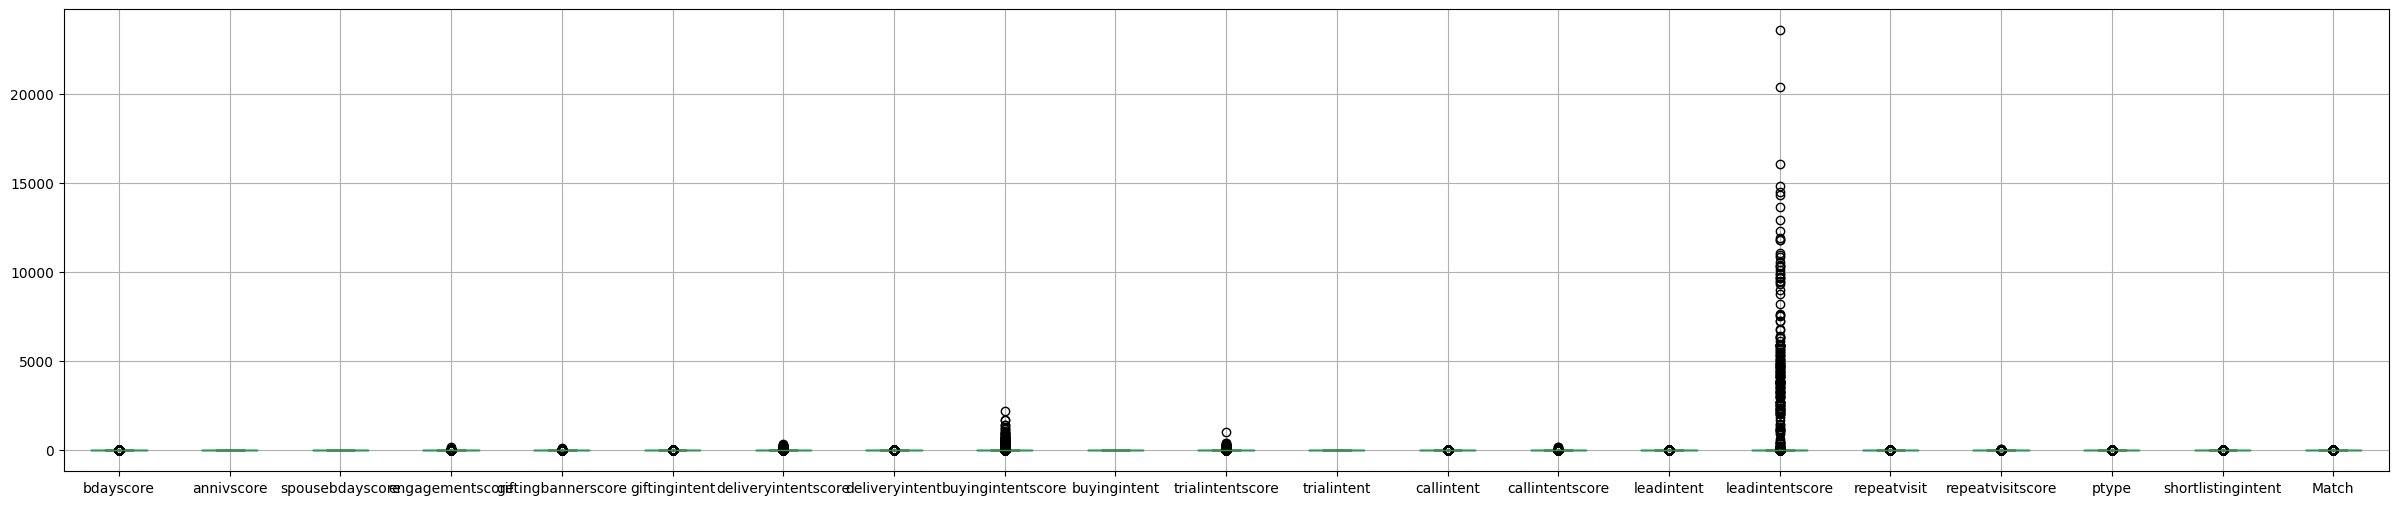

In [47]:
plt.figure(figsize=(30, 6))
modeldata.boxplot()
plt.show()

In [48]:
modeldata.columns

Index(['pros', 'bdayscore', 'annivscore', 'spousebdayscore', 'engagementscore',
       'giftingbannerscore', 'giftingintent', 'deliveryintentscore',
       'deliveryintent', 'buyingintentscore', 'buyingintent',
       'trialintentscore', 'trialintent', 'callintent', 'callintentscore',
       'leadintent', 'leadintentscore', 'repeatvisit', 'repeatvisitscore',
       'ptype', 'shortlistingintent', 'browsing_date', 'Match'],
      dtype='object')

In [49]:
#buyingintent score
#leadintent score

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
cols = [ 'bdayscore', 'annivscore', 'spousebdayscore', 'engagementscore',
       'giftingbannerscore', 'deliveryintentscore',
        'buyingintentscore',
       'trialintentscore',  'callintentscore',
        'leadintentscore', 'repeatvisitscore',
       ]
scaler = StandardScaler()
modeldata[cols]= scaler.fit_transform(modeldata[cols])

<Figure size 3000x600 with 0 Axes>

<Axes: >

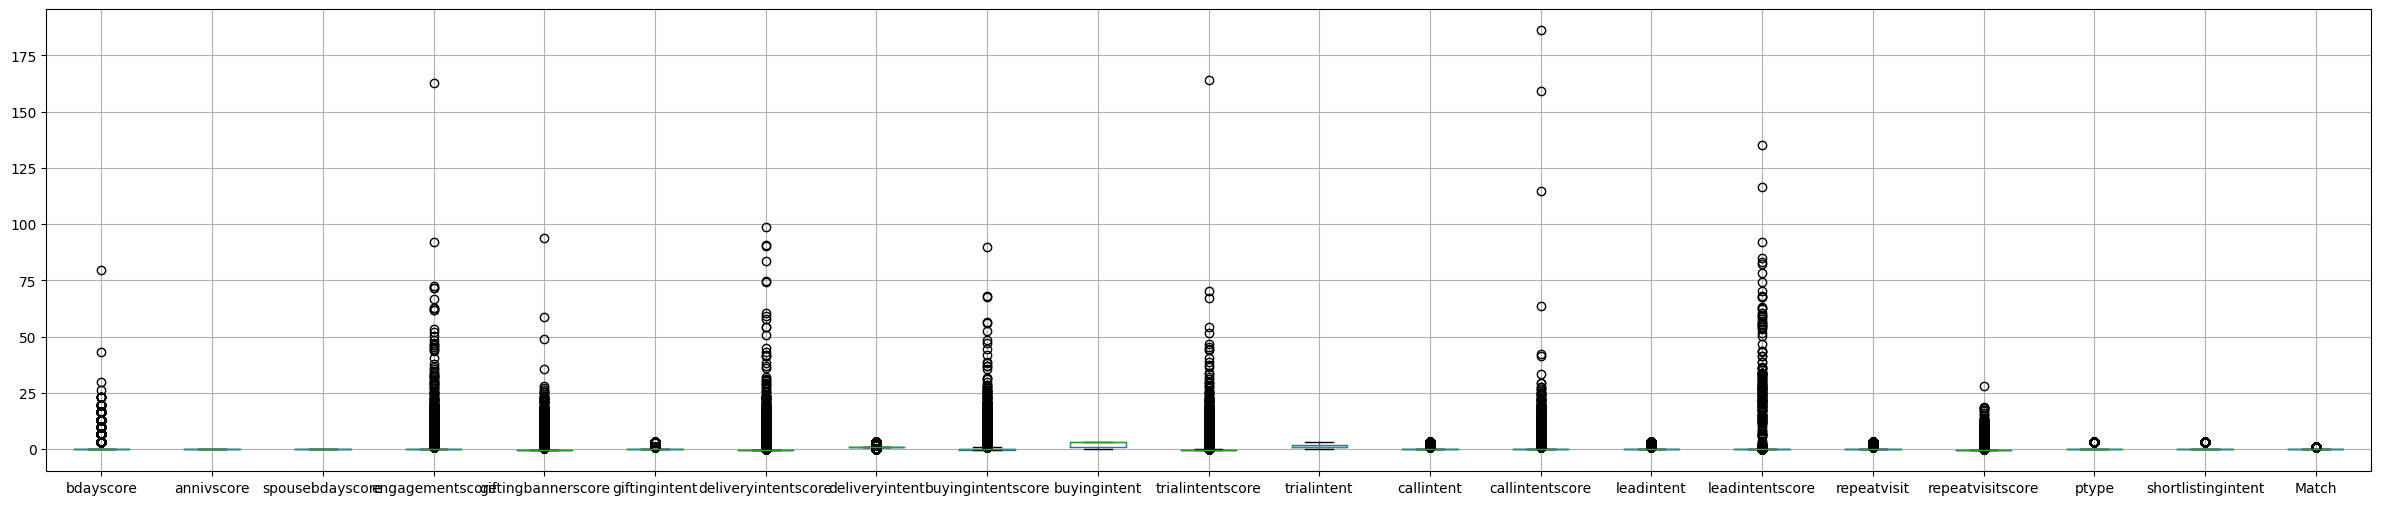

In [52]:
plt.figure(figsize=(30, 6))
modeldata.boxplot()
plt.show()

## Training data

In [53]:
colss = [ 'bdayscore', 'annivscore', 'spousebdayscore', 'engagementscore',
       'giftingbannerscore', 'giftingintent', 'deliveryintentscore',
       'deliveryintent', 'buyingintentscore', 'buyingintent',
       'trialintentscore', 'trialintent', 'callintent', 'callintentscore',
       'leadintent', 'leadintentscore', 'repeatvisit', 'repeatvisitscore',
       'ptype', 'shortlistingintent']

In [54]:
X = modeldata[colss]
y = modeldata['Match']
y = y.astype('int')

In [55]:
X.shape
y.shape
X.head()
y.head()

(224900, 20)

(224900,)

,bdayscore,annivscore,spousebdayscore,engagementscore,giftingbannerscore,giftingintent,deliveryintentscore,deliveryintent,buyingintentscore,buyingintent,trialintentscore,trialintent,callintent,callintentscore,leadintent,leadintentscore,repeatvisit,repeatvisitscore,ptype,shortlistingintent
0,-0.088015,0.0,0.0,-0.088083,-0.205952,0,-0.314521,0,-0.469523,0,-0.290671,0,0,-0.104833,0,-0.024479,0,-0.440163,3,3
1,-0.088015,0.0,0.0,-0.088083,-0.205952,0,-0.314521,0,-0.469523,0,-0.290671,0,1,-0.104833,1,-0.024479,3,2.596858,3,3
2,-0.088015,0.0,0.0,-0.088083,0.672341,1,-0.314521,1,2.134078,3,-0.290671,1,1,-0.104833,1,-0.024479,3,1.729138,0,0
3,-0.088015,0.0,0.0,-0.088083,-0.205952,0,-0.314521,1,-0.469523,1,0.689596,3,0,-0.104833,0,-0.024479,0,-0.440163,0,0
4,-0.088015,0.0,0.0,-0.088083,-0.205952,0,-0.314521,1,-0.062710,3,-0.290671,1,0,-0.104833,0,-0.024479,0,-0.440163,0,0


0    1
1    1
2    1
3    1
4    1
Name: Match, dtype: int32

In [56]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 55)
# # from imblearn.over_sampling import SMOTE
# # smote = SMOTE(random_state=42)
# # X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# from imblearn.over_sampling import ADASYN
# adasyn = ADASYN()
# X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [57]:
X_train_resampled.shape
y_train_resampled.shape
X_test.shape
y_test.shape

NameError: name 'X_train_resampled' is not defined

In [ ]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the number of folds
n_splits = 10

# Initialize lists to store evaluation metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Reset the index of DataFrame X
X_reset = X.reset_index(drop=True)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

params = {
    'max_depth': 6,                   # Maximum depth of a tree
    'learning_rate': 0.05,             # Learning rate (also known as eta)
    'n_estimators': 200,              # Number of boosting rounds (trees to build)
    'objective': 'binary:logistic',   # Objective function (binary classification)
    'eval_metric': 'logloss',         # Evaluation metric (log loss for binary classification)
    'subsample': 0.6,                 # Subsample ratio of the training instances
    'colsample_bytree': 0.6,          # Subsample ratio of columns when constructing each tree
    'colsample_bylevel': 0.6,         # Subsample ratio of columns for each level in the tree
    'gamma': 5,                       # Minimum loss reduction required to make a further partition on a leaf node
    'min_child_weight': 1,            # Minimum sum of instance weight needed in a child
    'reg_alpha': 0,                   # L1 regularization term on weights
    'reg_lambda': 1,                  # L2 regularization term on weights
    'scale_pos_weight': 1,            # Control the balance of positive and negative weights
    'random_state': 42,               # Random number seed
    'n_jobs': -1                      # Number of parallel threads used to run XGBoost
}

# Iterate over each fold
for train_index, test_index in skf.split(X_reset, y):
    X_train_resampled, X_test = X_reset.iloc[train_index], X_reset.iloc[test_index]
    y_train_resampled, y_test = y[train_index], y[test_index]
    
    # Initialize XGBoost model
    model = XGBClassifier(**params)

    # Train XGBoost model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Calculate mean scores
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1 = np.mean(f1_scores)

print("Mean Accuracy:", mean_accuracy)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

KeyboardInterrupt: 

## lazy predict

In [ ]:
import lazypredict
# from lazypredict import LazyClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# from lazypredict import LazyClassifier
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state =123)

In [ ]:
clf = LazyClassifier(verbose=0, 
                     ignore_warnings=False, 
                     custom_metric=None) 
  
# fitting data in LazyClassifier 
models, predictions = clf.fit(X_train, X_test, 
                              y_train, y_test) 
 
print(models) 

  0%|          | 0/29 [00:00<?, ?it/s]

 17%|█▋        | 5/29 [00:29<01:48,  4.54s/it]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 41%|████▏     | 12/29 [01:41<03:31, 12.47s/it]

LabelPropagation model failed to execute
Unable to allocate 241. GiB for an array with shape (179920, 179920) and data type float64


 45%|████▍     | 13/29 [01:41<02:21,  8.82s/it]

LabelSpreading model failed to execute
Unable to allocate 241. GiB for an array with shape (179920, 179920) and data type float64


 62%|██████▏   | 18/29 [03:54<02:47, 15.27s/it]

NuSVC model failed to execute
specified nu is infeasible


 90%|████████▉ | 26/29 [46:55<38:32, 770.80s/it]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 97%|█████████▋| 28/29 [47:00<06:56, 416.08s/it]

[LightGBM] [Info] Number of positive: 19947, number of negative: 159973
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013542 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 705
[LightGBM] [Info] Number of data points in the train set: 179920, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110866 -> initscore=-2.081926
[LightGBM] [Info] Start training from score -2.081926


100%|██████████| 29/29 [47:01<00:00, 97.29s/it] 

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.74               0.67     0.67      0.78   
GaussianNB                         0.75               0.67     0.67      0.79   
BernoulliNB                        0.79               0.63     0.63      0.81   
PassiveAggressiveClassifier        0.86               0.57     0.57      0.85   
KNeighborsClassifier               0.87               0.57     0.57      0.85   
ExtraTreeClassifier                0.89               0.54     0.54      0.85   
DecisionTreeClassifier             0.88               0.54     0.54      0.85   
RandomForestClassifier             0.89               0.54     0.54      0.85   
BaggingClassifier                  0.89               0.54     0.54      0.85   
ExtraTreesClassifier               0.89               0.54     0.54      0.85   
XGBClassifier               

In [58]:
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from imblearn.over_sampling import ADASYN

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
balanced_accuracy_scores = []
conf_matrices = []

X_reset = X.reset_index(drop=True)
# Loop through each fold
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X_reset.iloc[train_index], X_reset.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Apply ADASYN oversampling to training data
    ada = ADASYN(random_state=42)
    X_train_resampled, y_train_resampled = ada.fit_resample(X_train, y_train)
    
    # Initialize and train the model
    model = NearestCentroid()
    model.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    balanced_accuracy_scores.append(balanced_accuracy)
    conf_matrices.append(conf_matrix)

# Calculate average metrics
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)
avg_balanced_accuracy = sum(balanced_accuracy_scores) / len(balanced_accuracy_scores)

# Print average metrics
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1-score:", avg_f1)
print("Average Balanced Accuracy:", avg_balanced_accuracy)

NearestCentroid()

NearestCentroid()

NearestCentroid()

NearestCentroid()

NearestCentroid()

Average Accuracy: 0.8117163183637173
Average Precision: 0.8413362630709356
Average Recall: 0.8117163183637173
Average F1-score: 0.825017498812531
Average Balanced Accuracy: 0.6099691867469879


In [59]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
    
print(conf_matrix)

[[34715  5285]
 [ 3143  1837]]


In [61]:
# After cross-validation, train the final model on the entire dataset
import pickle
X_resampled, y_resampled = ada.fit_resample(X, y)

# Train the final model
final_model = NearestCentroid()
final_model.fit(X_resampled, y_resampled)

# Pickle the final model
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

print("Final model has been pickled.")

NearestCentroid()

Final model has been pickled.
